In [1]:
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

client = OpenAI(
    api_key=""
)

In [2]:
# Define Chat Functon
def chat_with_gpt(prompt, system_message, model="gpt-4o-mini", max_tokens=150):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": system_message},  # Define the assistant's behavior
                {"role": "user", "content": prompt},  # The user's input
            ],
            max_tokens=max_tokens,
            temperature=0.7,  # Adjust for randomness in responses
        )
        return response.choices[0].message.content
    except:
        return "error"

In [3]:
categories = ['animal', 'vegetable', 'fruit', 'clothes', 'vehicle', 'furniture', 'musical instrument', 'sport', 'profession']
country = "Germany"
language = "German"

In [4]:
# get data in the format: categories_to_exemplars = {'animal': [('ant', 'ameise'), ('antelope', 'antilope')], 'vegetable': [('asparagus', 'spargel']}
df = pd.read_excel('german_typicalities.xlsx', header=0)
df['Translation_British_English'] = df['Translation_British_English'].str.lower()
categories_to_exemplars = {}
for category in categories:
    exemplars = df[df['Semantic_Category'] == category][['Translation_British_English', 'German']]
    categories_to_exemplars[category] = list(zip(exemplars['Translation_British_English'], exemplars['German']))

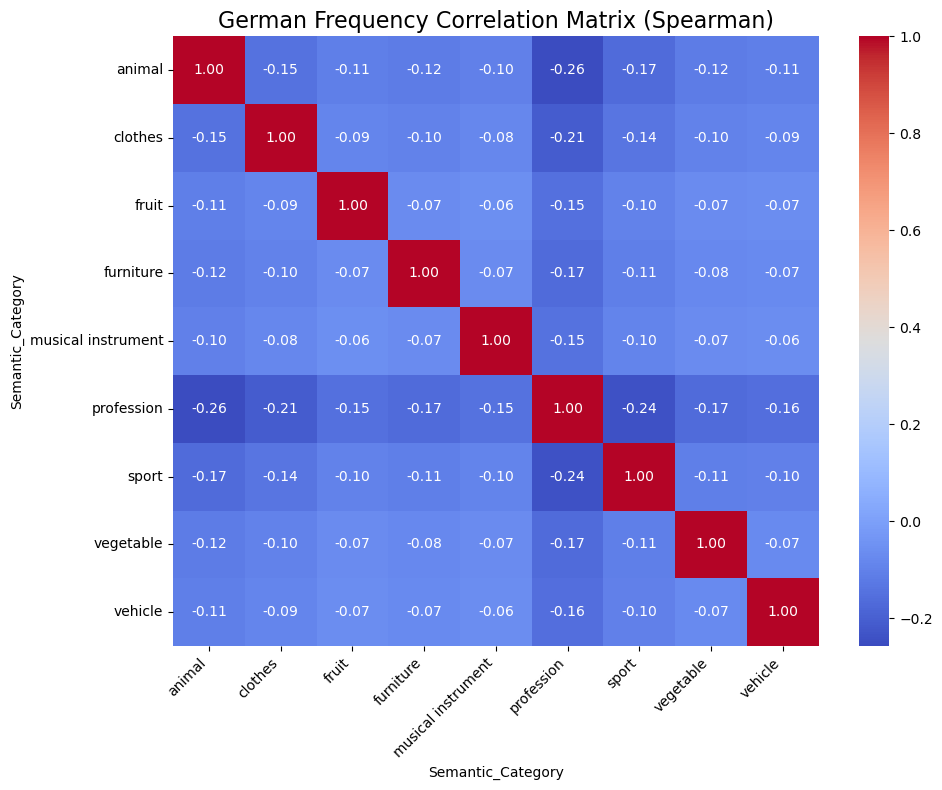

<Figure size 640x480 with 0 Axes>

In [5]:
# What I need -- for each category -- a heatmap for language by language correlation for that category
# Filter for relevant categories
filtered_df = df[df['Semantic_Category'].isin(categories)]

# Pivot the data to create a frequency matrix for each language
freq_matrix = filtered_df.pivot_table(
    index='Translation_British_English',
    columns='Semantic_Category',
    values='Frequency',
    fill_value=0
)

corr_matrix = freq_matrix.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.index)

# Add labels and title
plt.title("German Frequency Correlation Matrix (Spearman)", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()

# Show the plot
plt.show()

# Optionally save the heatmap as an image
plt.savefig('german_correlation_heatmap.png')

In [6]:
# Step 1: Translate Background Information:
system_role_for_rating = 'Du bist 35 Jahre alt und lebst in Deutschland. Du hast ein tiefes Verständnis für die deutsche Kultur, die Gepflogenheiten und den Alltag. Deine Antworten sollten die typischen Erfahrungen und Perspektiven einer durchschnittlichen Person in Deutschland widerspiegeln.'
system_role_for_translation = f"You are a 35 year old adult living in {country}. You have a deep understanding of {language} culture, customs, and daily life"

In [7]:
translated_background = """
Typikalitätseffekte beziehen sich auf den Einfluss der Typikalität oder Prototypikalität eines Objekts oder einer Kategorie auf verschiedene kognitive Prozesse wie Wahrnehmung, Kategorisierung und Gedächtnis. Das Konzept der Typikalität stammt aus der Prototypentheorie, die besagt, dass unsere mentalen Repräsentationen von Kategorien auf Prototypen oder typischen Beispielen basieren.

Im Kontext der Wahrnehmung können Typikalitätseffekte beeinflussen, wie wir Objekte wahrnehmen und erkennen. Objekte, die prototypischer oder repräsentativer für eine Kategorie sind, werden in der Regel schneller und genauer wahrgenommen als untypische Objekte. Zum Beispiel wird ein typischer Vogel wie ein Rotkehlchen schneller erkannt als ein weniger typischer Vogel wie ein Pinguin, wenn eine Reihe von Vogelbildern gezeigt wird.

Bei Kategorisierungsaufgaben können Typikalitätseffekte beeinflussen, wie wir Objekte in Kategorien einordnen. Prototypische oder sehr typische Objekte werden mit höherer Wahrscheinlichkeit ihrer entsprechenden Kategorie zugeordnet als untypische Objekte. Zum Beispiel wird ein Apfel, als ein hochtypisches Obst, mit größerer Wahrscheinlichkeit als Frucht klassifiziert im Vergleich zu einer weniger typischen Frucht wie der Durian.

Insgesamt zeigen Typikalitätseffekte, wie die Typikalität oder Prototypikalität von Objekten innerhalb einer Kategorie unsere Wahrnehmungs-, Kategorisierungs- und Gedächtnisprozesse beeinflusst. Dies unterstreicht die zentrale Rolle von Prototypen im kognitiven Denken.
"""

In [8]:
n_trials = 10
likert_to_rating = {"stimme uberhaupt nicht zu": 1, "stimme nicht zu": 2, "stimme eher nicht zu": 3,
                    "weder zustimmung noch ablehnung": 4, "stimme eher zu": 5, "stimme zu": 6,
                    "stimme voll und ganz zu": 7}

In [9]:
# Prompt -- likert, ant as animal
"""
Du bist 35 Jahre alt und lebst in Deutschland. Du hast ein tiefes Verständnis für die deutsche Kultur, die Gepflogenheiten und den Alltag. Deine Antworten sollten die typischen Erfahrungen und Perspektiven einer durchschnittlichen Person in Deutschland widerspiegeln.

Typikalitätseffekte beziehen sich auf den Einfluss der Typikalität oder Prototypikalität eines Objekts oder einer Kategorie auf verschiedene kognitive Prozesse wie Wahrnehmung, Kategorisierung und Gedächtnis. Das Konzept der Typikalität stammt aus der Prototypentheorie, die besagt, dass unsere mentalen Repräsentationen von Kategorien auf Prototypen oder typischen Beispielen basieren.

Im Kontext der Wahrnehmung können Typikalitätseffekte beeinflussen, wie wir Objekte wahrnehmen und erkennen. Objekte, die prototypischer oder repräsentativer für eine Kategorie sind, werden in der Regel schneller und genauer wahrgenommen als untypische Objekte. Zum Beispiel wird ein typischer Vogel wie ein Rotkehlchen schneller erkannt als ein weniger typischer Vogel wie ein Pinguin, wenn eine Reihe von Vogelbildern gezeigt wird.

Bei Kategorisierungsaufgaben können Typikalitätseffekte beeinflussen, wie wir Objekte in Kategorien einordnen. Prototypische oder sehr typische Objekte werden mit höherer Wahrscheinlichkeit ihrer entsprechenden Kategorie zugeordnet als untypische Objekte. Zum Beispiel wird ein Apfel, als ein hochtypisches Obst, mit größerer Wahrscheinlichkeit als Frucht klassifiziert im Vergleich zu einer weniger typischen Frucht wie der Durian.

Insgesamt zeigen Typikalitätseffekte, wie die Typikalität oder Prototypikalität von Objekten innerhalb einer Kategorie unsere Wahrnehmungs-, Kategorisierungs- und Gedächtnisprozesse beeinflusst. Dies unterstreicht die zentrale Rolle von Prototypen im kognitiven Denken.

Bewerten Sie, wie typisch eine Ameise (Ameise) in der Kategorie Tier ist. Verwenden Sie die folgende Skala: Stimme überhaupt nicht zu, Stimme nicht zu, Stimme eher nicht zu, Weder Zustimmung noch Ablehnung, Stimme eher zu, Stimme zu, Stimme voll und ganz zu.
Geben Sie nur die Bewertung ohne weitere Beschreibung aus.
"""

'\nDu bist 35 Jahre alt und lebst in Deutschland. Du hast ein tiefes Verständnis für die deutsche Kultur, die Gepflogenheiten und den Alltag. Deine Antworten sollten die typischen Erfahrungen und Perspektiven einer durchschnittlichen Person in Deutschland widerspiegeln.\n\nTypikalitätseffekte beziehen sich auf den Einfluss der Typikalität oder Prototypikalität eines Objekts oder einer Kategorie auf verschiedene kognitive Prozesse wie Wahrnehmung, Kategorisierung und Gedächtnis. Das Konzept der Typikalität stammt aus der Prototypentheorie, die besagt, dass unsere mentalen Repräsentationen von Kategorien auf Prototypen oder typischen Beispielen basieren.\n\nIm Kontext der Wahrnehmung können Typikalitätseffekte beeinflussen, wie wir Objekte wahrnehmen und erkennen. Objekte, die prototypischer oder repräsentativer für eine Kategorie sind, werden in der Regel schneller und genauer wahrgenommen als untypische Objekte. Zum Beispiel wird ein typischer Vogel wie ein Rotkehlchen schneller erkann

In [11]:
all_df = {}
only_output_rating = ' Geben Sie nur die Bewertung ohne weitere Beschreibung aus.'

for category in categories_to_exemplars.keys():
    category_df = pd.DataFrame(columns=["likert_average", "rating_average"])

    for instance in categories_to_exemplars[category]:
        instance_english = instance[0]
        instance_german = instance[1]
        likert_total = 0
        rating_total = 0

        # Step 2: Translate Likert Scale Prompt
        user_prompt = (
            f""" Translate the following text into {language}, ensuring that it captures the linguistic nuances, 
            idiomatic expressions, and cultural context of the language. Adapt phrases as necessary to make them resonate with an {language}-speaking audience, 
            reflecting the tone, formality, and emotional subtleties appropriate to the situation.
            
            Rate how typical a {instance_english} ({instance_german}) is in the category of {category}. Use the following rating scale: 
            stimme uberhaupt nicht zu, stimme nicht zu, stimme eher nicht zu, weder zustimmung noch ablehnung, stimme eher zu, stimme zu, stimme voll und ganz zu.
            """
        )
        likert_scale_prompt = translated_background + chat_with_gpt(user_prompt, system_role_for_translation) + only_output_rating

        # Step 3: Translate Rating Prompt:
        user_prompt = (
            f""" Translate the following text into {language}, ensuring that it captures the linguistic nuances, 
            idiomatic expressions, and cultural context of the language. Adapt phrases as necessary to make them resonate with an {language}-speaking audience, 
            reflecting the tone, formality, and emotional subtleties appropriate to the situation.
            
            Rate how typical a {instance_english} ({instance_german}) is in the category of {category}. Use a 1 to 10 rating scale, including all real numbers in the range.
            """
        )
        rating_prompt = translated_background + chat_with_gpt(user_prompt, system_role_for_translation) + only_output_rating

        # Step 4: Get Likert and Rating
        for n in range(n_trials):
            likert = chat_with_gpt(likert_scale_prompt, system_role_for_rating)
            # Normalize characters (converts 'ü' to 'u', etc.)
            likert = unicodedata.normalize('NFKD', likert).encode('ASCII', 'ignore').decode('ASCII')
            likert = likert.strip().lower().rstrip('.')

            rating = chat_with_gpt(rating_prompt, system_role_for_rating)

            if likert not in likert_to_rating:
                print("Error in conversion: invalid likert rating")
            else:
                likert_total += likert_to_rating.get(likert, 0)

            try:
                rating_total += float(rating)
            except ValueError:
                print("Error in conversion: invalid rating value")

            print(f"Cateogry: {category}, Instance: {instance_english} , Likert: {likert}, Rating: {rating}")
            print(likert_total, rating_total)
        category_df.loc[instance_english] = [likert_total/n_trials, rating_total/n_trials]
    all_df[category] = category_df


Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7.
5 7.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7.
10 14.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7.
15 21.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7.
20 28.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7
25 35.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7.
30 42.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7
35 49.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7
40 56.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 7.
45 63.0
Cateogry: animal, Instance: ant , Likert: stimme eher zu, Rating: 6.
50 69.0
Cateogry: animal, Instance: antelope , Likert: stimme eher zu, Rating: 6
5 6.0
Cateogry: animal, Instance: antelope , Likert: stimme eher zu, Rating: 6
10 12.0
Cateogry: animal, Instance: antelope , Likert: stimme eher zu, Rating: 6
15

In [12]:
for category, data in all_df.items():
    # Sort by 'likert_average' (descending), then by index (alphabetically)
    df_sorted_by_likert = data.sort_values(by=['likert_average'], ascending=False).sort_index(ascending=True)
    data['likert_rank'] = df_sorted_by_likert['likert_average'].rank(method='first', ascending=False).astype(int)
    
    # Sort by 'rating_average' (descending), then by index (alphabetically)
    df_sorted_by_rating = data.sort_values(by=['rating_average'], ascending=False).sort_index(ascending=True)
    data['rating_rank'] = df_sorted_by_rating['rating_average'].rank(method='first', ascending=False).astype(int)
    
    # Save the DataFrame for the category to a CSV file
    csv_filename = f"{category}_german.csv"
    data.to_csv(csv_filename, index_label='Exemplar')
    
    # Print category and DataFrame
    print(category)
    print(data)



animal
           likert_average  rating_average  likert_rank  rating_rank
ant                   5.0             6.9           29           43
antelope              4.6             6.1           45           56
badger                3.0             0.0           65          106
bat                   2.9             5.1          104           70
bear                  5.2             7.0           20           34
...                   ...             ...          ...          ...
wild boar             3.0             9.0          101            6
wild cat              3.0             7.0          102           42
wolf                  6.4             7.9           11           21
worm                  3.0             3.9          103          101
zebra                 5.0             6.1           43           59

[109 rows x 4 columns]
vegetable
                  likert_average  rating_average  likert_rank  rating_rank
asparagus                    6.6            9.00           15       

In [ ]:
# Removed some rows in profession: writer, bookseller, ect because the rating was incomprehensible
categories = ['animal', 'vegetable', 'fruit', 'clothes', 'vehicle', 'furniture', 'musical instrument', 'sport', 'profession']

for category in categories:
    path = category + '.csv'
    data = pd.read_csv(path)

    # Sort by 'likert_average' (descending), then by index (alphabetically)
    df_sorted_by_likert = data.sort_values(by=['likert_average'], ascending=False).sort_index(ascending=True)
    data['likert_rank'] = df_sorted_by_likert['likert_average'].rank(method='first', ascending=False).astype(int)
    
    # Sort by 'rating_average' (descending), then by index (alphabetically)
    df_sorted_by_rating = data.sort_values(by=['rating_average'], ascending=False).sort_index(ascending=True)
    data['rating_rank'] = df_sorted_by_rating['rating_average'].rank(method='first', ascending=False).astype(int)
    
    # Save the DataFrame for the category to a CSV file
    data.to_csv(path, index_label='Exemplar')

In [2]:
import pandas as pd

# Load the Excel file
file_path = 'german_typicalities.xlsx'
df = pd.read_excel(file_path)

# Convert the second column to lowercase
df['Translation_British_English'] = df['Translation_British_English'].str.lower()

# Save the updated dataframe back to the Excel file or display it
df.to_excel('german_typicalities.xlsx', index=False)
print(df)


                  German Translation_British_English Semantic_Category  \
0                 Ameise                         ant            animal   
1               Antilope                    antelope            animal   
2                  Dachs                      badger            animal   
3             Fledermaus                         bat            animal   
4                    Bär                        bear            animal   
..                   ...                         ...               ...   
819            Schweißer                      welder        profession   
820  Großhandelskaufmann                  wholesaler        profession   
821       Schriftsteller                      writer        profession   
822          Tierpfleger                   zookeeper        profession   
823              Zoologe                   zoologist        profession   

     Frequency  
0         0.40  
1         0.35  
2         0.20  
3         0.15  
4         0.60  
..       

In [ ]:
categories = ['animal', 'vegetable', 'fruit', 'clothes', 'vehicle', 'furniture', 'musical instrument', 'sport', 'profession']

for category in categories:
    path = category + '.csv'
    df = pd.read_csv(path)

    df = df.iloc[:, 1:]

    # Save the updated dataframe back to a new CSV file or display it
    df.to_csv(path, index=False)
    print(df)

    Exemplar.1  likert_average  rating_average  likert_rank  rating_rank
0          ant             5.0             6.9           29           43
1     antelope             4.6             6.1           45           56
2       badger             3.0             0.0           65          106
3          bat             2.9             5.1          104           70
4         bear             5.2             7.0           20           34
..         ...             ...             ...          ...          ...
104  wild boar             3.0             9.0          101            6
105   wild cat             3.0             7.0          102           42
106       wolf             6.4             7.9           11           21
107       worm             3.0             3.9          103          101
108      zebra             5.0             6.1           43           59

[109 rows x 5 columns]
          Exemplar.1  likert_average  rating_average  likert_rank  rating_rank
0          asparagus 

: 